In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [9]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


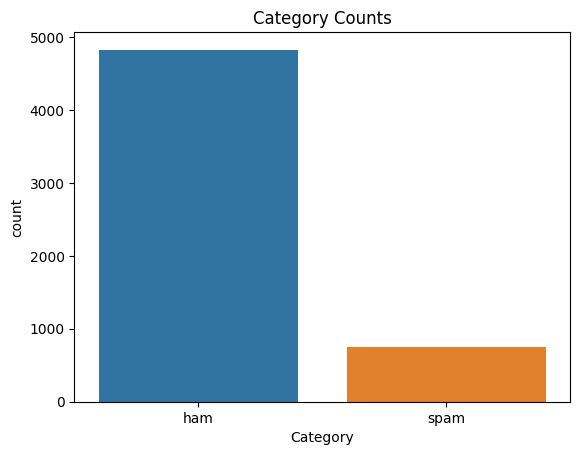

In [11]:
sns.countplot(x=df["Category"])
plt.title("Category Counts")
plt.show()

In [12]:
le = LabelEncoder()

df['Category_enc'] = le.fit_transform(df['Category'])

display(df.head())

print(df.dtypes)

,Category,Message,Category_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Category        object
Message         object
Category_enc     int64
dtype: object


In [13]:
# Store the number of words in each messages
df['word_count'] = df['Message'].str.split().str.len()


In [14]:
# make it lower case
tokenized_messages = df['Message'].str.lower().str.split(' ')

# Print the tokens to see how it looks like
print(tokenized_messages)

0       [go, until, jurong, point,, crazy.., available...
1                    [ok, lar..., joking, wif, u, oni...]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor..., u, c, already...
4       [nah, i, don't, think, he, goes, to, usf,, he,...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568        [will, ü, b, going, to, esplanade, fr, home?]
5569    [pity,, *, was, in, mood, for, that., so...any...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                    [rofl., its, true, to, its, name]
Name: Message, Length: 5572, dtype: object


In [15]:
tokenized_messages[0]

['go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'cine',
 'there',
 'got',
 'amore',
 'wat...']

In [16]:
# Define a function to returns only alphanumeric tokens
def alpha(tokens):
    """This function removes all non-alphanumeric characters"""
    alpha = []
    for token in tokens:
        new_s = ''.join(c for c in token if c.isalnum())
        alpha.append(new_s)
    return alpha

In [17]:
# Apply our function to tokens
for i in range(len(tokenized_messages)):
    tokenized_messages[i]=alpha(tokenized_messages[i])
# print(tokenized_messages)

In [18]:
df['Message']=tokenized_messages

In [19]:
def to_sentence(tokens):
    s=""
    for token in tokens:
        s=s+" "+token
    return s[1:]

In [20]:
for i in range(len(tokenized_messages)):
    tokenized_messages[i]=to_sentence(tokenized_messages[i])

In [21]:
tokenized_messages

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ü b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: Message, Length: 5572, dtype: object

In [22]:
df["Message"]=tokenized_messages

In [23]:
display(df)

,Category,Message,Category_enc,word_count
0,ham,go until jurong point crazy available only in ...,0,20
1,ham,ok lar joking wif u oni,0,6
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1,28
3,ham,u dun say so early hor u c already then say,0,11
4,ham,nah i dont think he goes to usf he lives aroun...,0,13
...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,1,30
5568,ham,will ü b going to esplanade fr home,0,8
5569,ham,pity was in mood for that soany other suggest...,0,10
5570,ham,the guy did some bitching but i acted like id ...,0,26


In [24]:
from sklearn.model_selection import train_test_split
X=df.Message
y=df.Category_enc

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
vec = CountVectorizer().fit(X_train)

In [28]:
X_train = vec.transform(X_train).toarray()
X_test =vec.transform(X_test).toarray()

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
model = GaussianNB()

In [31]:
model.fit(X_train, y_train)

GaussianNB()

In [32]:
pred = model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score,f1_score

In [34]:
accuracy_score(pred,y_test)

0.8905829596412556

In [35]:
# But class imbalnce so accuracy is not a good measure

In [36]:
# f1 score
f1_score(pred,y_test)

0.695

In [37]:
# now import the confusion matrix to see the results in detail 
from sklearn.metrics import confusion_matrix

confusion_matrix(pred,y_test)


array([[854,  10],
       [112, 139]])

#### another model of BernoulliNB

In [38]:
# import the bernoulli naive bayes model and train it on the same data 
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()

model.fit(X_train, y_train)

pred = model.predict(X_test)

accuracy_score(pred,y_test)

0.9695067264573991

In [39]:
# f1 score 
f1_score(pred,y_test)

0.8721804511278196

In [40]:
# confusion matrix 
confusion_matrix(pred,y_test)


array([[965,  33],
       [  1, 116]])

#### Now use the MultinomialNB

In [41]:
# import the multinomial naive bayes model and train it on the same data
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)

pred = model.predict(X_test)

accuracy_score(pred,y_test)

0.9838565022421525

In [42]:
# f1 score
print(f1_score(pred,y_test))

# confusion matrix
print(confusion_matrix(pred,y_test))

0.9375
[[962  14]
 [  4 135]]


Prediction on new unseen data

In [43]:
# now predict one new unseen user input spam message 
new_message = "Congratulations! you have won a lottery of $1000000. Please contact us to claim your prize"

new_message = vec.transform([new_message]).toarray()

pred = model.predict(new_message)

if pred[0]==0:
    print("Not Spam")
else:
    print("Spam")



Spam
